# Основы машинного обучения, ПАДиИИ

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 4. Градиентный спуск



Задание выполнил(а):

Демьянов Степан

В этом задании две части - теоретическая и практическая.  

Теорию нужно набирать, используя LaTex. А практику - используя Python!


> Максимальный балл за домашнее задание - 10

## Общая информация

__Внимание!__  

* Домашнее задание выполняется самостоятельно
* Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов
* Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

## Часть 1 (теоретическая)

### Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

1)
   $Q(w) = (y - xw)^T(y - xw) + \lambda w^2$
   $Q(w) = y^Ty - 2y^T xw + w^T x^T x w + \lambda w^2$
   $\nabla_w Q(w) = -2x^T y + 2x^T x w + 2\lambda w$

   Приравниваем к нулю

   $
   (x^T x + \lambda I)w = x^T y \implies w = (x^T x + \lambda I)^{-1} x^T y
   $

2)
   $\nabla^2_w Q(w) = 2x^T x + 2\lambda I$

   Матрица $ x^T x $ положительно полуопределена, $\lambda > 0 $, значит, $ \nabla^2_w Q(w) $ положительно определена. Следовательно, точка минимума.  

3)
   $w_{k+1} = w_k - \eta \left( x^T (x w_k - y) + \lambda w_k \right)$

## Часть 2 (практическая)

### Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [1]:
import numpy as np

# Функция и её производная
def f(x):
  return x * np.sin(5 * x) + 0.1 * x ** 2

def df(x):
  return np.sin(5 * x) + 5 * x * np.cos(5 * x) + 0.2 * x

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6, maximize=False):
    path = [x0]
    x = x0
    sign = 2 * maximize - 1
    for _ in range(max_iter):
        grad = df(x)
        x_new = x + sign * eta * grad
        if abs(x_new - x) < tol:
            break
        x = x_new
        path.append(x)
    path = np.array(path)
    return x, path

# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):
    min_x, min_path = gradient_descent(f, df, x0, eta,
                                       max_iter, tol, maximize=False)
    max_x, max_path = gradient_descent(f, df, x0, eta,
                                       max_iter, tol, maximize=True)
    return {'min': (min_x, f(min_x)), 'max': (max_x, f(max_x))}

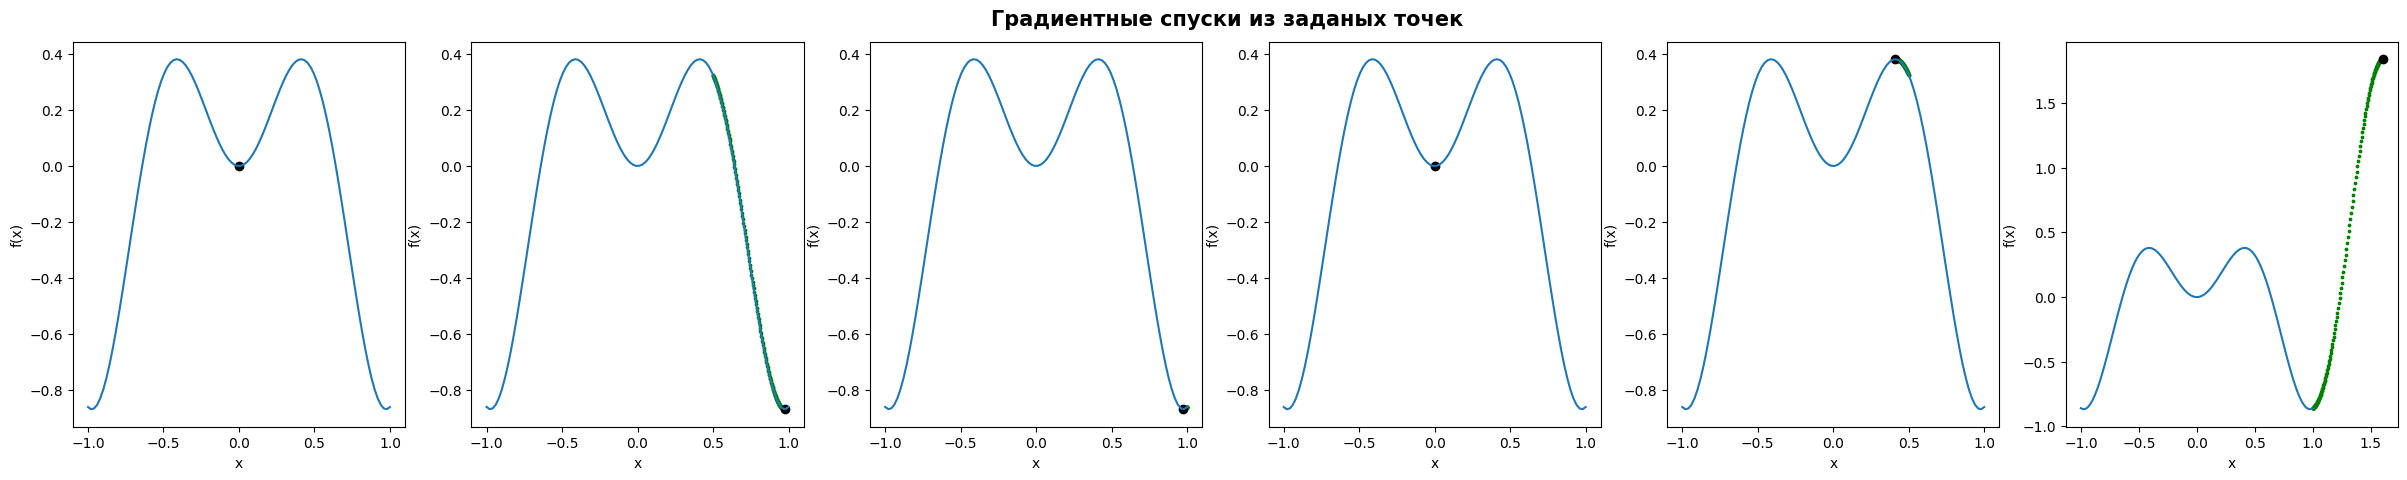

In [2]:
import matplotlib.pyplot as plt
eta  = 0.001
x_0, gradient_path_0 = gradient_descent(f, df, 0, eta)
x_1, gradient_path_1 = gradient_descent(f, df, 0.5, eta)
x_2, gradient_path_2 = gradient_descent(f, df, 1, eta)
x_3, gradient_path_3 = gradient_descent(f, df, 0, eta, maximize=True)
x_4, gradient_path_4 = gradient_descent(f, df, 0.5, eta, maximize=True)
x_5, gradient_path_5 = gradient_descent(f, df, 1, eta, maximize=True)
x = np.linspace(-1, 1, 100)
fig, axs = plt.subplots(1, 6, figsize=(30, 5))
plt.text(-10.4, 2.1, "Градиентные спуски из заданых точек", weight='bold', size=15)
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].plot(x, f(x))
axs[0].scatter(gradient_path_0, f(np.array(gradient_path_0)), color='green', s=3, alpha=1)
axs[0].scatter(x_0, f(x_0), color='black', marker='o')
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].plot(x, f(x))
axs[1].scatter(gradient_path_1, f(np.array(gradient_path_1)), color='green', s=3, alpha=1)
axs[1].scatter(x_1, f(x_1), color= 'black', marker='o')
axs[2].set_xlabel("x")
axs[2].set_ylabel("f(x)")
axs[2].plot(x, f(x))
axs[2].scatter(gradient_path_2, f(np.array(gradient_path_2)), color='green', s=3, alpha=1)
axs[2].scatter(x_2, f(x_2), color= 'black', marker='o')
axs[3].set_xlabel("x")
axs[3].set_ylabel("f(x)")
axs[3].plot(x, f(x))
axs[3].scatter (gradient_path_3, f(np.array(gradient_path_3)), color='green', s=3, alpha=1)
axs[3].scatter(x_3, f(x_3), color='black', marker='o')
axs[4].set_xlabel("x")
axs[4].set_ylabel("f(x)")
axs[4].plot(x, f(x))
axs[4].scatter(gradient_path_4, f(np.array(gradient_path_4)), color='green', s=3, alpha=1)
axs[4].scatter(x_4, f(x_4), color= 'black', marker='o')
axs[5].set_xlabel("x")
axs[5].set_ylabel("f(x)")
axs[5].plot(x, f(x))
axs[5].scatter(gradient_path_5, f(np.array(gradient_path_5)), color='green', s=3, alpha=1)
axs[5].scatter(x_5, f(x_5), color= 'black', marker='o')

In [3]:
x0_list = [0, 0.5, 1]
results = {}
for x0 in x0_list:
    output = find_points(f, df, x0, eta)
    results[x0] = output

for x0 in x0_list:
    print(f"Старт из x0={x0}:")
    print(f"Минимум: x={results[x0]['min'][0]:.4f}, f(x)={results[x0]['min'][1]:.4f}")
    print(f"Максимум: x={results[x0]['max'][0]:.4f}, f(x)={results[x0]['max'][1]:.4f}\n")

Старт из x0=0:
Минимум: x=0.0000, f(x)=0.0000
Максимум: x=0.0000, f(x)=0.0000

Старт из x0=0.5:
Минимум: x=0.9751, f(x)=-0.8671
Максимум: x=0.4119, f(x)=0.3807

Старт из x0=1:
Минимум: x=0.9751, f(x)=-0.8671
Максимум: x=1.6035, f(x)=1.8392



Для точки x0=0 мы получили, что максимум и минимум это точка x=0, это произошло, потому что в этой точке производная (градиент) нулевой, и условие $abs(x_{new} - x) < tol$ срабатывает моментально, обрывая цикл.


### Задание 3 (**0.5 балла**)

Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [4]:
def ols_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

### Задание 5 (**1 балл**)
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [5]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=10000, batch_size=32):
    n, m = X.shape
    w = np.zeros(m)
    loss_history = []
    for i in range(iterations):
        indices = np.random.choice(n, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        grad = X_batch.T @ (X_batch @ w - y_batch) / batch_size
        w -= learning_rate * grad
        if i % 100 == 0:
            y_pred = X @ w
            loss = np.mean((y_pred - y) ** 2)
            loss_history.append(loss)
    return w, loss_history

### Задание 6 (**3 балла**)
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [6]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,   # number of samples
                          n_features=10,      # number of features
                          n_informative=8,    # number of useful features
                          noise=100,          # bias and standard deviation of the guassian noise
                          coef=True,          # true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

from sklearn.metrics import r2_score
import time

X = np.c_[np.ones((X.shape[0], 1)), X]

start = time.time()
w_ols = ols_solution(X, y)
ols_time = time.time() - start

def gradient_descent(X, y, lr=0.01, iterations=10000):
    w = np.zeros(X.shape[1])
    loss_history = []
    n = len(y)
    for _ in range(iterations):
        y_pred = X @ w
        loss = np.mean((y_pred - y) ** 2)
        loss_history.append(loss)
        grad = X.T @ (y_pred - y) / n
        w -= lr * grad
    return w, loss_history


start = time.time()
w_gd, loss_gd = gradient_descent(X, y)
gd_time = time.time() - start

start = time.time()
w_sgd, loss_sgd = stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=10000)
sgd_time = time.time() - start

y_pred_ols = X @ w_ols
y_pred_gd = X @ w_gd
y_pred_sgd = X @ w_sgd

r2_ols = r2_score(y, y_pred_ols)
r2_gd = r2_score(y, y_pred_gd)
r2_sgd = r2_score(y, y_pred_sgd)

print(f"R² OLS: {r2_ols:.4f}, время: {ols_time:.2f} сек")
print(f"R² GD: {r2_gd:.4f}, время: {gd_time:.2f} сек")
print(f"R² SGD: {r2_sgd:.4f}, время: {sgd_time:.2f} сек")

R² OLS: 0.5606, время: 0.03 сек
R² GD: 0.7555, время: 38.05 сек
R² SGD: 0.7551, время: 27.04 сек


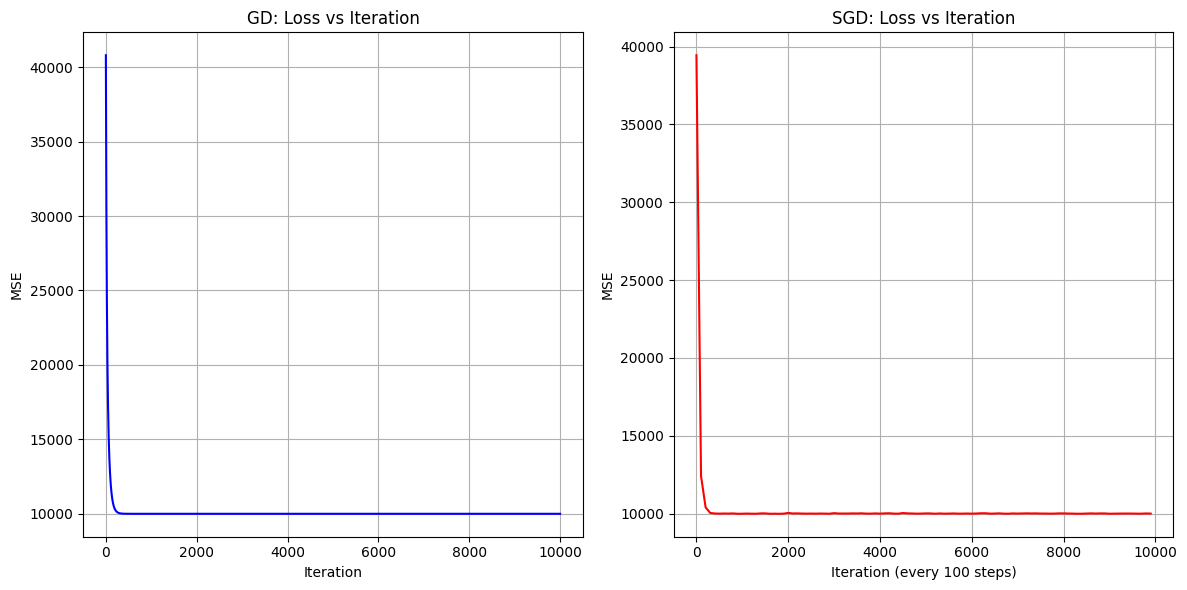

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_gd, color='blue')
plt.title('GD: Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, len(loss_sgd)*100, 100), loss_sgd, color='red')
plt.title('SGD: Loss vs Iteration')
plt.xlabel('Iteration (every 100 steps)')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

OLS и GD справились отлично, SGD не достиг точного минимума из-за стохастичности.

Время: OLS < SGD < GD (для больших данных).


Наивысший R² у OLS, так как это точное решение.

### Задание 7 (**1.5 балла**)

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [8]:
def sgd_l2(X, y, learning_rate=0.01, iterations=1000, l2=0.1):
    n, m = X.shape
    w = np.zeros(m)
    for _ in range(iterations):
        idx = np.random.randint(n)
        X_i = X[idx]
        y_i = y[idx]
        grad = (X_i @ w - y_i) * X_i + 2 * l2 * w
        w -= learning_rate * grad
    return w


for l2 in np.arange(0.1, 1.1, 0.1):
    w = sgd_l2(X, y, l2=l2)
    y_pred = X @ w
    r2 = r2_score(y, y_pred)
    print(f"λ={l2:.1f}, R²={r2:.4f}")

λ=0.1, R²=0.7041
λ=0.2, R²=0.6842
λ=0.3, R²=0.6894
λ=0.4, R²=0.6612
λ=0.5, R²=0.6491
λ=0.6, R²=0.6254
λ=0.7, R²=0.5816
λ=0.8, R²=0.5427
λ=0.9, R²=0.5804
λ=1.0, R²=0.5333


Наилучшее качество при λ=0.1 или близких значениях, так как большие λ увеличивают смещение.

### Задание 8 (**2 балла**)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [9]:
def modified_grad_descent(X, y, lr=0.01, beta=0.9, iterations=1000):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    for _ in range(iterations):
        grad = X.T @ (X @ w - y) / len(y)
        v = beta * v + (1 - beta) * grad
        w -= lr * v
    return w

## Бонус

### Задание 9 (**0.5 балла**)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

`Ваш ответ здесь`

## Заключительная часть

Вы молодцы, это было непросто!


Поделитесь впечатлениями о задании:

    (ваши эмоции от домашней работы)

P.S Удачного кодинга!  
Пейте ристретто, пишите эффективный Python!!